# mini projet K-means 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  1) importation du dataSet 

In [14]:
data = pd.read_csv('StudentsPerformance.csv')
print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2) Analyse 

In [15]:
df = data.copy()     #cree une copie du data set 

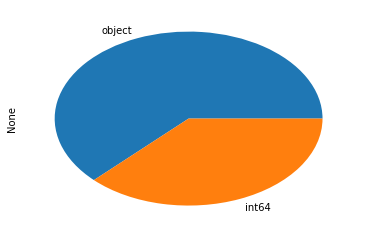

In [16]:
df.dtypes.value_counts().plot.pie()   #visualiser le nombre des diffrent type de variable 

C:\Users\user.user-PC\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


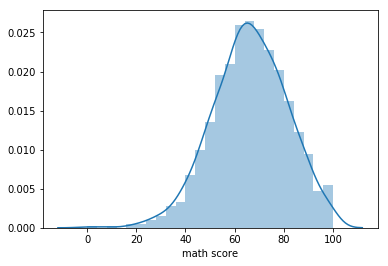

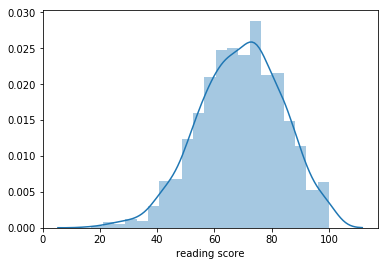

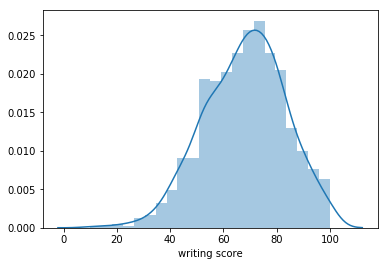

In [17]:
df_hist =df.copy()
for col in df_hist.select_dtypes('int64'):
    df_hist.dropna(subset=[col], inplace=True)
    df_hist[col].fillna(0, inplace=True)
    plt.figure()
    sns.distplot(df_hist[col])

In [18]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [19]:
for col in df.select_dtypes('object'):
    print('{col:-<50} {values}'.format(col=col, values=df[col].unique()))

gender-------------------------------------------- ['female' 'male']
race/ethnicity------------------------------------ ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education----------------------- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch--------------------------------------------- ['standard' 'free/reduced']
test preparation course--------------------------- ['none' 'completed']


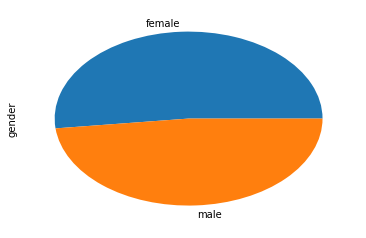

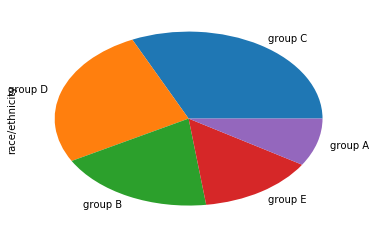

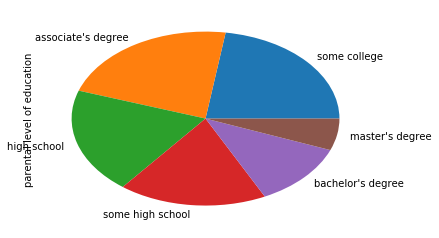

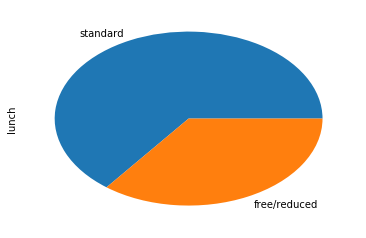

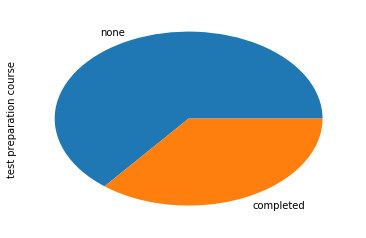

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## 3) PreTraitement 

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3_1) encodage 

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder_0 = LabelEncoder()
df['gender']=encoder_0.fit_transform(df['gender'])
encoder_1 = LabelEncoder()
df['race/ethnicity']=encoder_1.fit_transform(df['race/ethnicity'])
encoder_2 = LabelEncoder()
df['parental level of education']=encoder_2.fit_transform(df['parental level of education'])
encoder_3 = LabelEncoder()
df['lunch']=encoder_3.fit_transform(df['lunch'])
encoder_4 = LabelEncoder()
df['test preparation course']=encoder_4.fit_transform(df['test preparation course'])

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [56]:
for col in df.iloc[:,:5]:
    print('{col:-<50} {values}'.format(col=col, values=df[col].unique()))

gender-------------------------------------------- [0 1]
race/ethnicity------------------------------------ [0.25 0.5  0.   0.75 1.  ]
parental level of education----------------------- [0.2 0.8 0.6 0.  0.4 1. ]
lunch--------------------------------------------- [1 0]
test preparation course--------------------------- [1 0]


In [62]:
decodage=encoder_4.inverse_transform([1])
decodage

array(['none'], dtype=object)

### 3_2) normalisation 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
df_minmax_1 = scaler.fit_transform(df[['parental level of education']])
df_minmax_2 = scaler.fit_transform(df[['race/ethnicity']])

df['parental level of education'] = df_minmax_1
df['race/ethnicity'] = df_minmax_2

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0.25,0.2,1,1,72,72,74
1,0,0.50,0.8,1,0,69,90,88
2,0,0.25,0.6,1,1,90,95,93
3,1,0.00,0.0,0,1,47,57,44
4,1,0.50,0.8,1,1,76,78,75


# ----------------------------------------------------------

# K-means

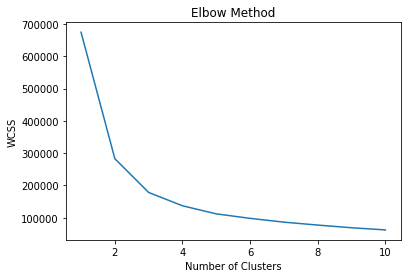

In [29]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [45]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

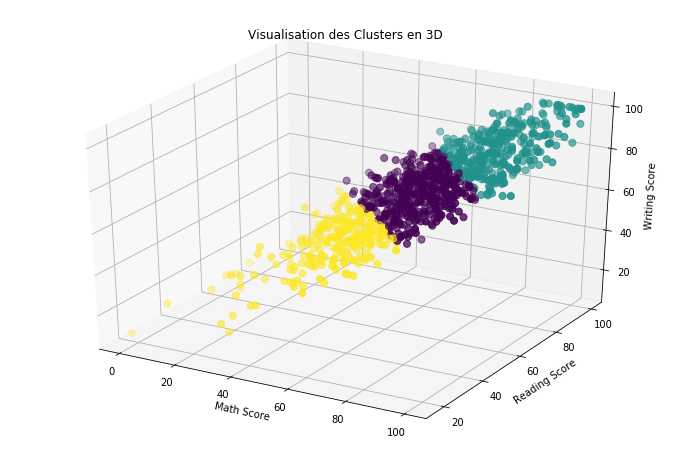

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['math score'], df['reading score'], df['writing score'], c=cluster_labels, cmap='viridis', s=50)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')

plt.title('Visualisation des Clusters en 3D')
plt.show()


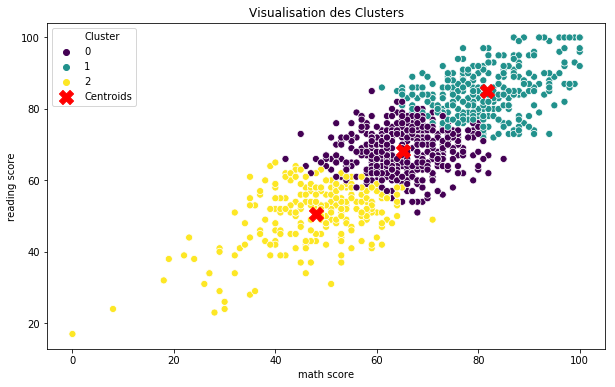

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Cluster'] = cluster_labels


plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=df, palette='viridis', s=50)
plt.scatter(cluster_centers[:, 5], cluster_centers[:, 6], c='red', marker='X', s=200, label='Centroids')
plt.title('Visualisation des Clusters')
plt.legend()
plt.show()

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,0,0.25,0.2,1,1,72,72,74,0
1,0,0.50,0.8,1,0,69,90,88,1
2,0,0.25,0.6,1,1,90,95,93,1
3,1,0.00,0.0,0,1,47,57,44,2
4,1,0.50,0.8,1,1,76,78,75,1


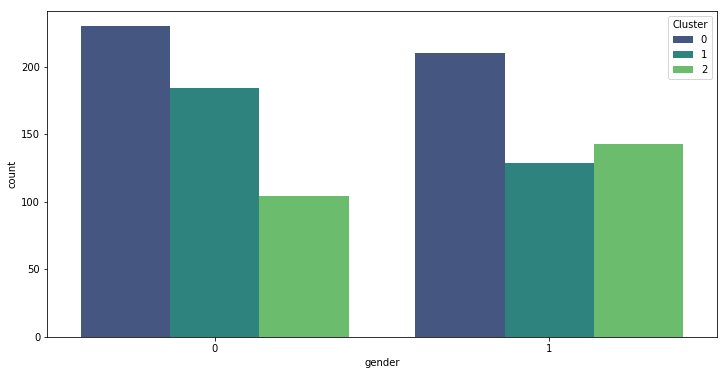

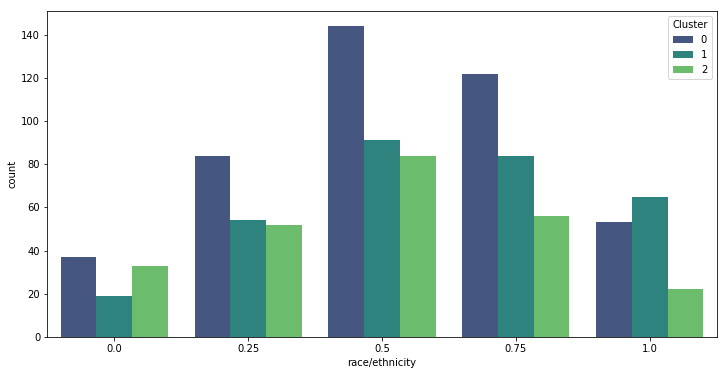

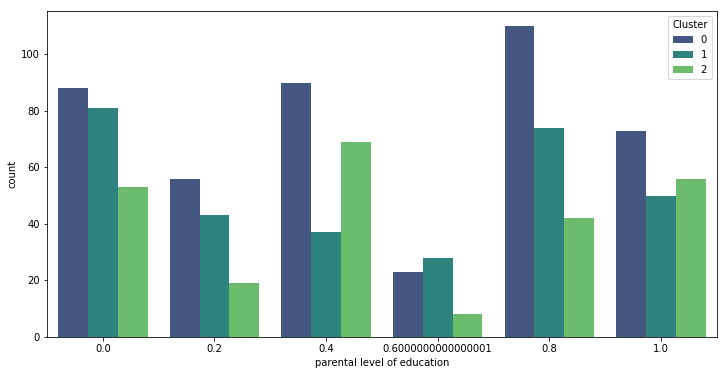

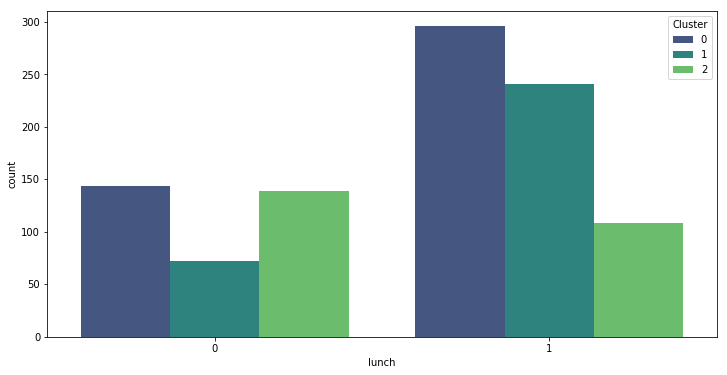

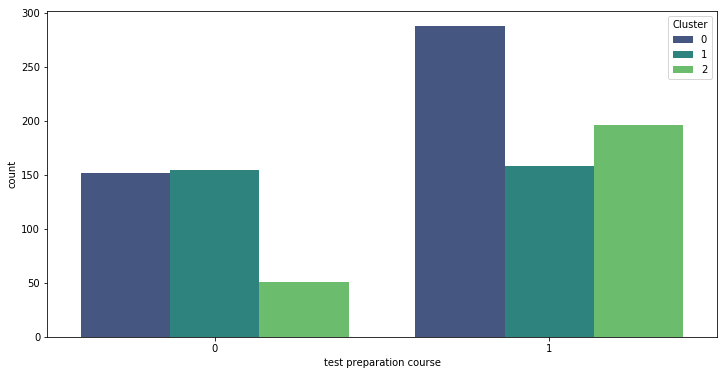

In [49]:

for feature in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Cluster', data=df, palette='viridis')
    plt.show()



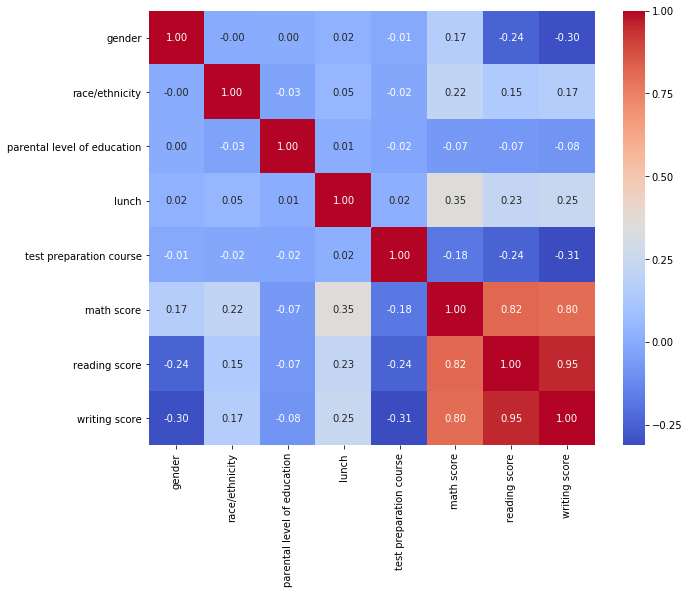

In [64]:
# Supprimer la colonne 'Cluster' pour calculer la matrice de corrélation
correlation_df = df.drop('Cluster', axis=1)

# Calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Utiliser seaborn pour afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


# ------------------------------------